<a href="https://colab.research.google.com/github/Dimple7777/INSE6220/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install slim version (default)
!pip install pycaret

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dash-bootstrap-components to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.8/535.8 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Dimple7777/INSE6220/main/Admission_Predict.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/myconcordia/INSE6220/refs/heads/main/seeds.csv')
df=df.drop(columns=['Serial No.'])
df.head(25)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0         337          118                  4  4.5   4.5  9.65         1   
1         324          107                  4  4.0   4.5  8.87         1   
2         316          104                  3  3.0   3.5  8.00         1   
3         322          110                  3  3.5   2.5  8.67         1   
4         314          103                  2  2.0   3.0  8.21         0   
5         330          115                  5  4.5   3.0  9.34         1   
6         321          109                  3  3.0   4.0  8.20         1   
7         308          101                  2  3.0   4.0  7.90         0   
8         302          102                  1  2.0   1.5  8.00         0   
9         323          108                  3  3.5   3.0  8.60         0   
10        325          106                  3  3.5   4.0  8.40         1   
11        327          111                  4  4.0   4.5  9.00         1   
12        328          112                  4  4.0   4.5  9.10         1   
13        307          109                  3  4.0   3.0  8.00         1   
14        311          104                  3  3.5   2.0  8.20         1   
15        314          105                  3  3.5   2.5  8.30         0   
16        317          107                  3  4.0   3.0  8.70         0   
17        319          106                  3  4.0   3.0  8.00         1   
18        318          110                  3  4.0   3.0  8.80         0   
19        303          102                  3  3.5   3.0  8.50         0   
20        312          107                  3  3.0   2.0  7.90         1   
21        325          114                  4  3.0   2.0  8.40         0   
22        328          116                  5  5.0   5.0  9.50         1   
23        334          119                  5  5.0   4.5  9.70         1   
24        336          119                  5  4.0   3.5  9.80         1   

    Chance of Admit   
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
5               0.90  
6               0.75  
7               0.68  
8               0.50  
9               0.45  
10              0.52  
11              0.84  
12              0.78  
13              0.62  
14              0.61  
15              0.54  
16              0.66  
17              0.65  
18              0.63  
19              0.62  
20              0.64  
21              0.70  
22              0.94  
23              0.95  
24              0.97

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


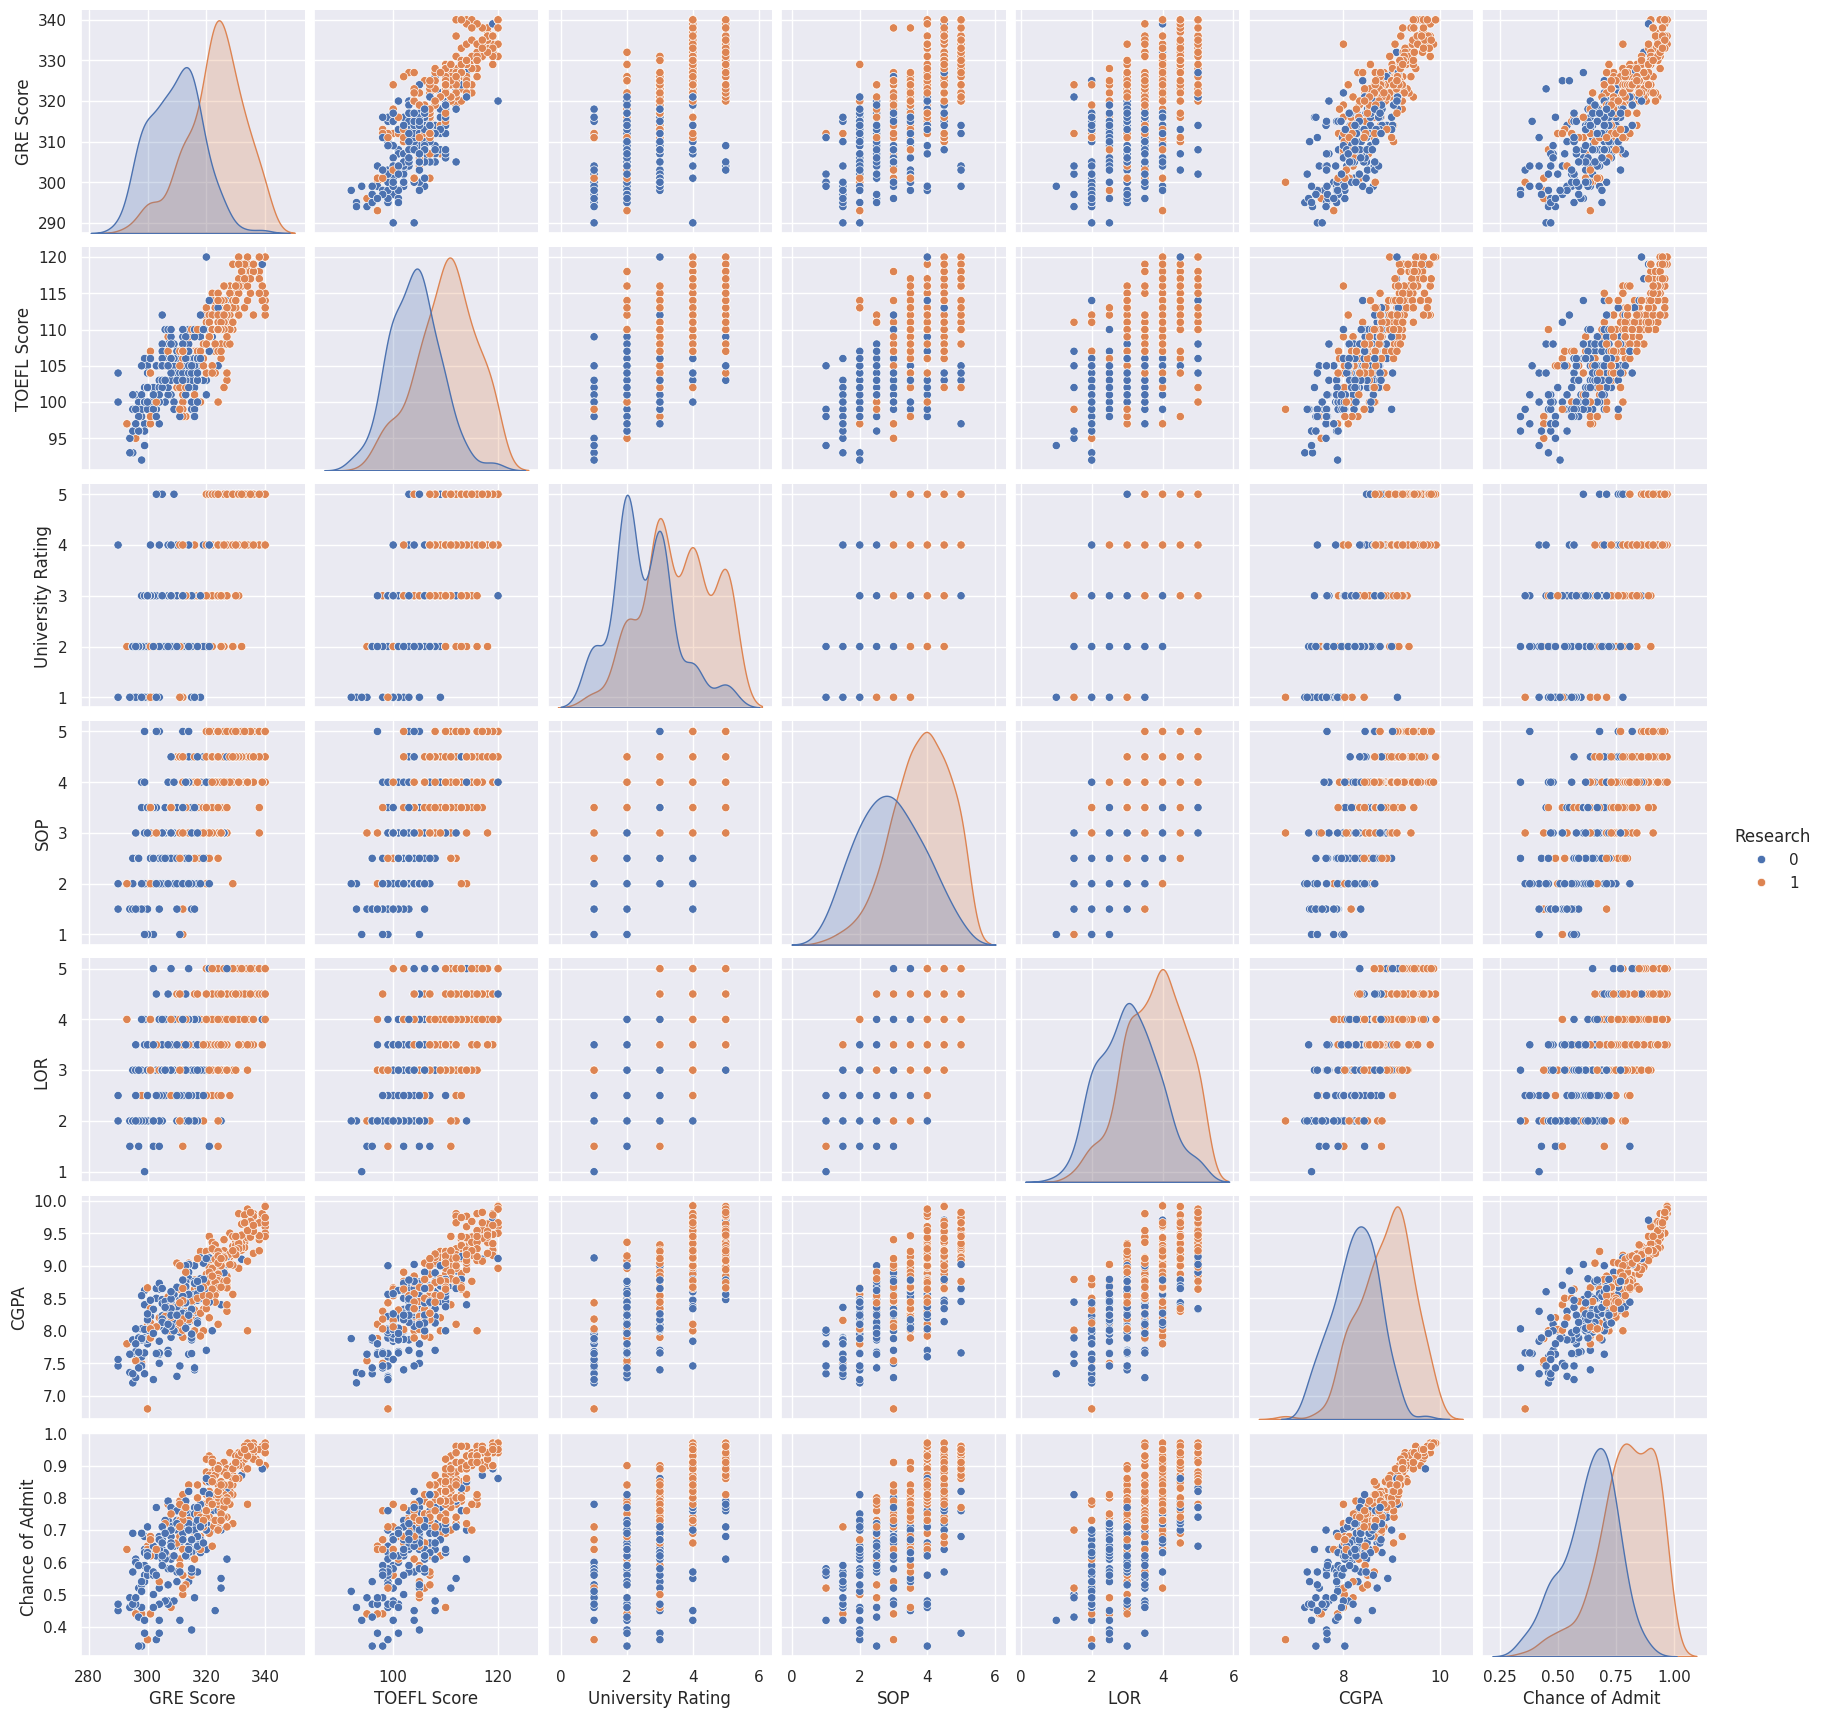

In [ ]:
sns.pairplot(df, hue='Research')
plt.show()

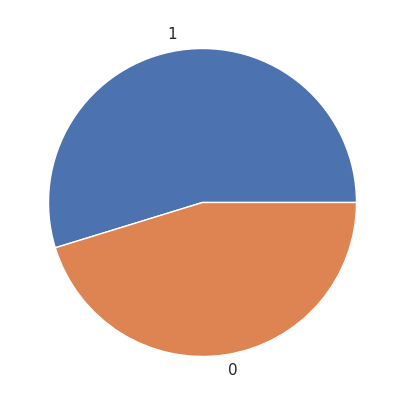

In [ ]:
y =df['Research']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
X = df.drop(columns=['Research'])
X.head(10)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0        337          118                  4  4.5   4.5  9.65   
1        324          107                  4  4.0   4.5  8.87   
2        316          104                  3  3.0   3.5  8.00   
3        322          110                  3  3.5   2.5  8.67   
4        314          103                  2  2.0   3.0  8.21   
5        330          115                  5  4.5   3.0  9.34   
6        321          109                  3  3.0   4.0  8.20   
7        308          101                  2  3.0   4.0  7.90   
8        302          102                  1  2.0   1.5  8.00   
9        323          108                  3  3.5   3.0  8.60   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  
5              0.90  
6              0.75  
7              0.68  
8              0.50  
9              0.45

In [ ]:
X.describe().transpose()

count        mean        std     min     25%     50%  \
GRE Score          400.0  316.807500  11.473646  290.00  308.00  317.00   
TOEFL Score        400.0  107.410000   6.069514   92.00  103.00  107.00   
University Rating  400.0    3.087500   1.143728    1.00    2.00    3.00   
SOP                400.0    3.400000   1.006869    1.00    2.50    3.50   
LOR                400.0    3.452500   0.898478    1.00    3.00    3.50   
CGPA               400.0    8.598925   0.596317    6.80    8.17    8.61   
Chance of Admit    400.0    0.724350   0.142609    0.34    0.64    0.73   

                        75%     max  
GRE Score          325.0000  340.00  
TOEFL Score        112.0000  120.00  
University Rating    4.0000    5.00  
SOP                  4.0000    5.00  
LOR                  4.0000    5.00  
CGPA                 9.0625    9.92  
Chance of Admit      0.8300    0.97

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.762107     1.746971           0.798829  1.093864  1.167321  1.764818   
1   0.627656    -0.067635           0.798829  0.596653  1.167321  0.455151   
2  -0.070467    -0.562528          -0.076600 -0.397769  0.052933 -1.005631   
3   0.453126     0.427257          -0.076600  0.099442 -1.061454  0.119339   
4  -0.244998    -0.727492          -0.952029 -1.392191 -0.504260 -0.653029   
5   1.151249     1.252078           1.674257  1.093864 -0.504260  1.244310   
6   0.365860     0.262293          -0.076600 -0.397769  0.610127 -0.669819   
7  -0.768590    -1.057420          -0.952029 -0.397769  0.610127 -1.173537   
8  -1.292182    -0.892456          -1.827457 -1.392191 -2.175842 -1.005631   
9   0.540391     0.097329          -0.076600  0.099442 -0.504260  0.001805   

   Chance of Admit   
0          1.373648  
1          0.250297  
2         -0.030541  
3          0.531135  
4         -0.522007  
5          1.233229  
6          0.180087  
7         -0.311379  
8         -1.575149  
9         -1.926196

In [ ]:
X.describe().transpose()

count          mean       std       min       25%  \
GRE Score          400.0 -4.174439e-16  1.001252 -2.339367 -0.768590   
TOEFL Score        400.0  5.595524e-16  1.001252 -2.542098 -0.727492   
University Rating  400.0  7.105427e-17  1.001252 -1.827457 -0.952029   
SOP                400.0  7.993606e-17  1.001252 -2.386613 -0.894980   
LOR                400.0 -1.332268e-16  1.001252 -2.733036 -0.504260   
CGPA               400.0  7.771561e-16  1.001252 -3.020504 -0.720191   
Chance of Admit    400.0 -3.375078e-16  1.001252 -2.698500 -0.592217   

                        50%       75%       max  
GRE Score          0.016799  0.714922  2.023903  
TOEFL Score       -0.067635  0.757186  2.076899  
University Rating -0.076600  0.798829  1.674257  
SOP                0.099442  0.596653  1.591075  
LOR                0.052933  0.610127  1.724515  
CGPA               0.018596  0.778370  2.218165  
Chance of Admit    0.039668  0.741763  1.724695

In [ ]:
observations = list(df.index)
variables = list(df.columns)

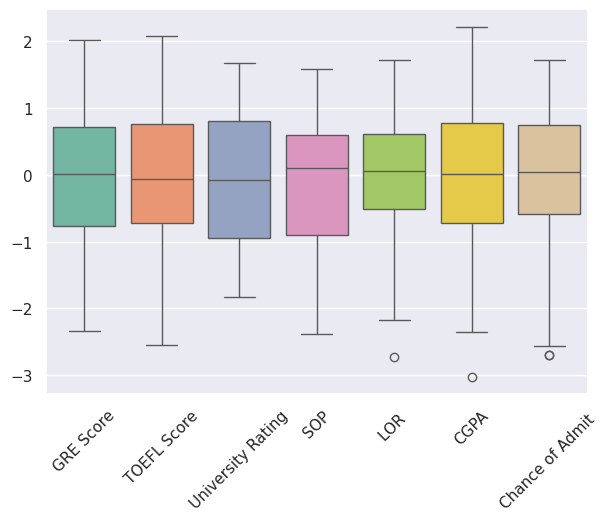

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

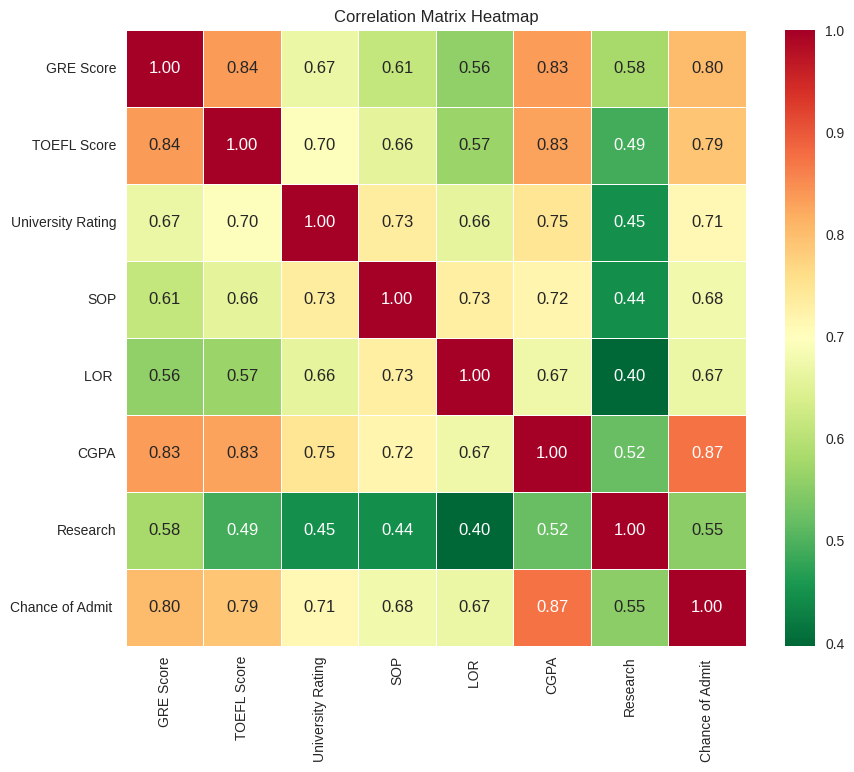

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Dimple7777/INSE6220/main/Admission_Predict.csv')

# Extract the numerical features (excluding 'Serial No.' and 'Research')
numerical_features = df.select_dtypes(include=np.number).drop(columns=['Serial No.', ], errors='ignore')

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn_r', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

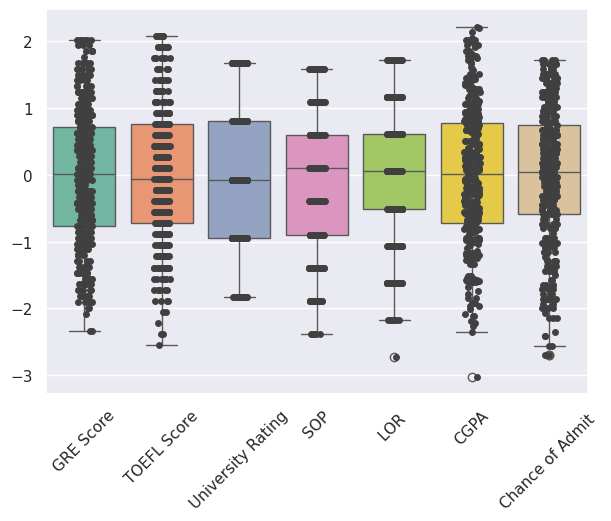

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

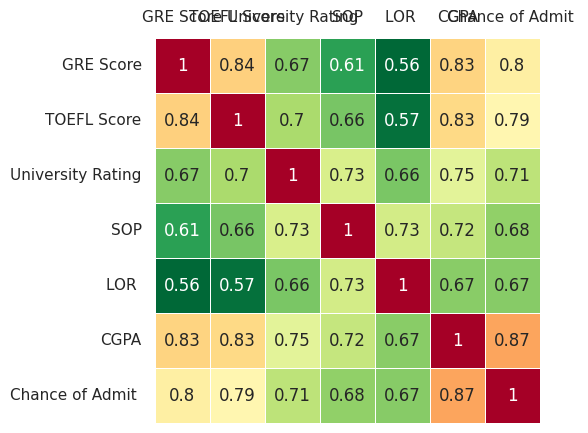

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_2$')

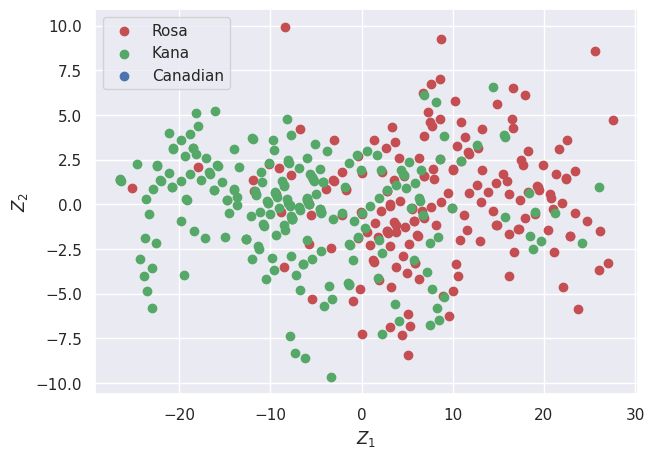

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

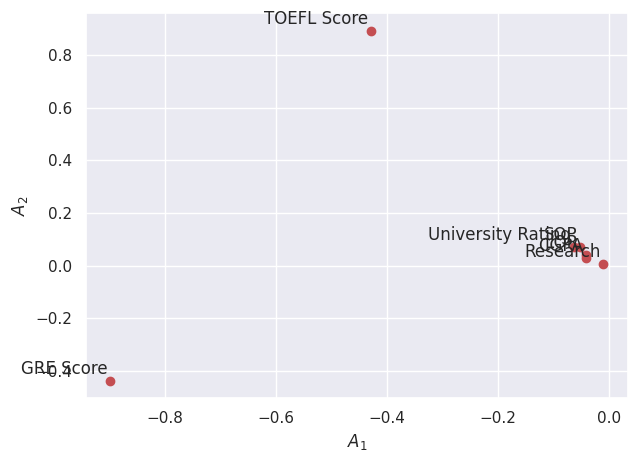

In [ ]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

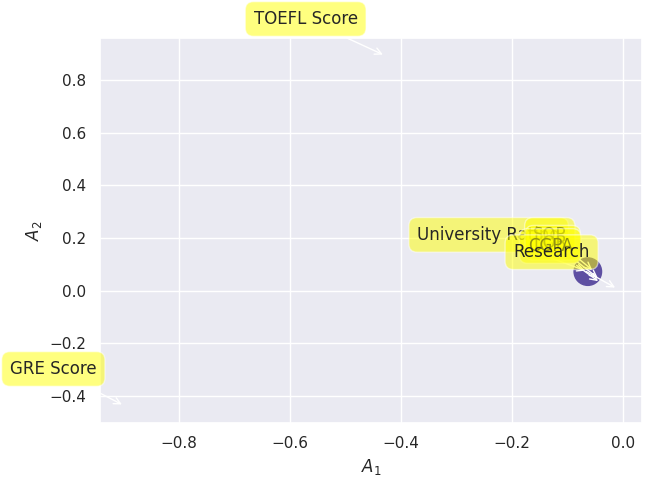

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

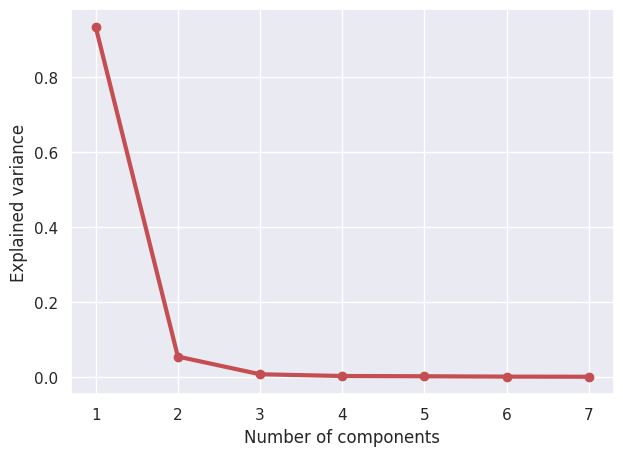

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

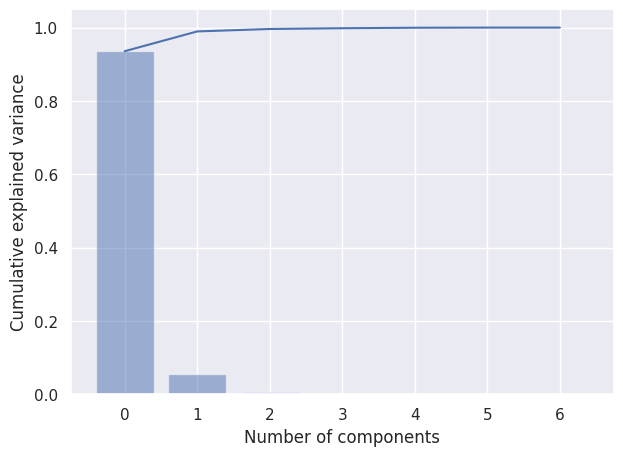

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

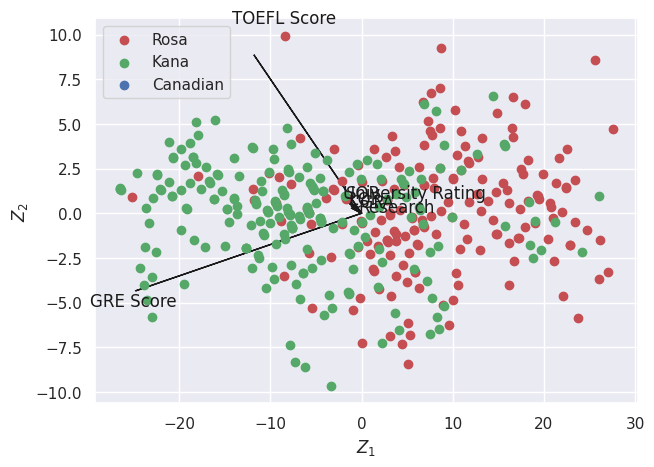

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=0.85)
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
out['PC']

PC1
0   -22.870908
1    -6.428705
2     2.232100
3    -5.736638
4     4.583387
..         ...
395  -7.589605
396  -7.182326
397 -15.744232
398   6.176237
399 -18.855376

[400 rows x 1 columns]

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '1 Principal Components explain [98.95%] of the variance'}, xlabel='PC1 (93.5% expl.var)', ylabel='PC2 (0% expl.var)'>)

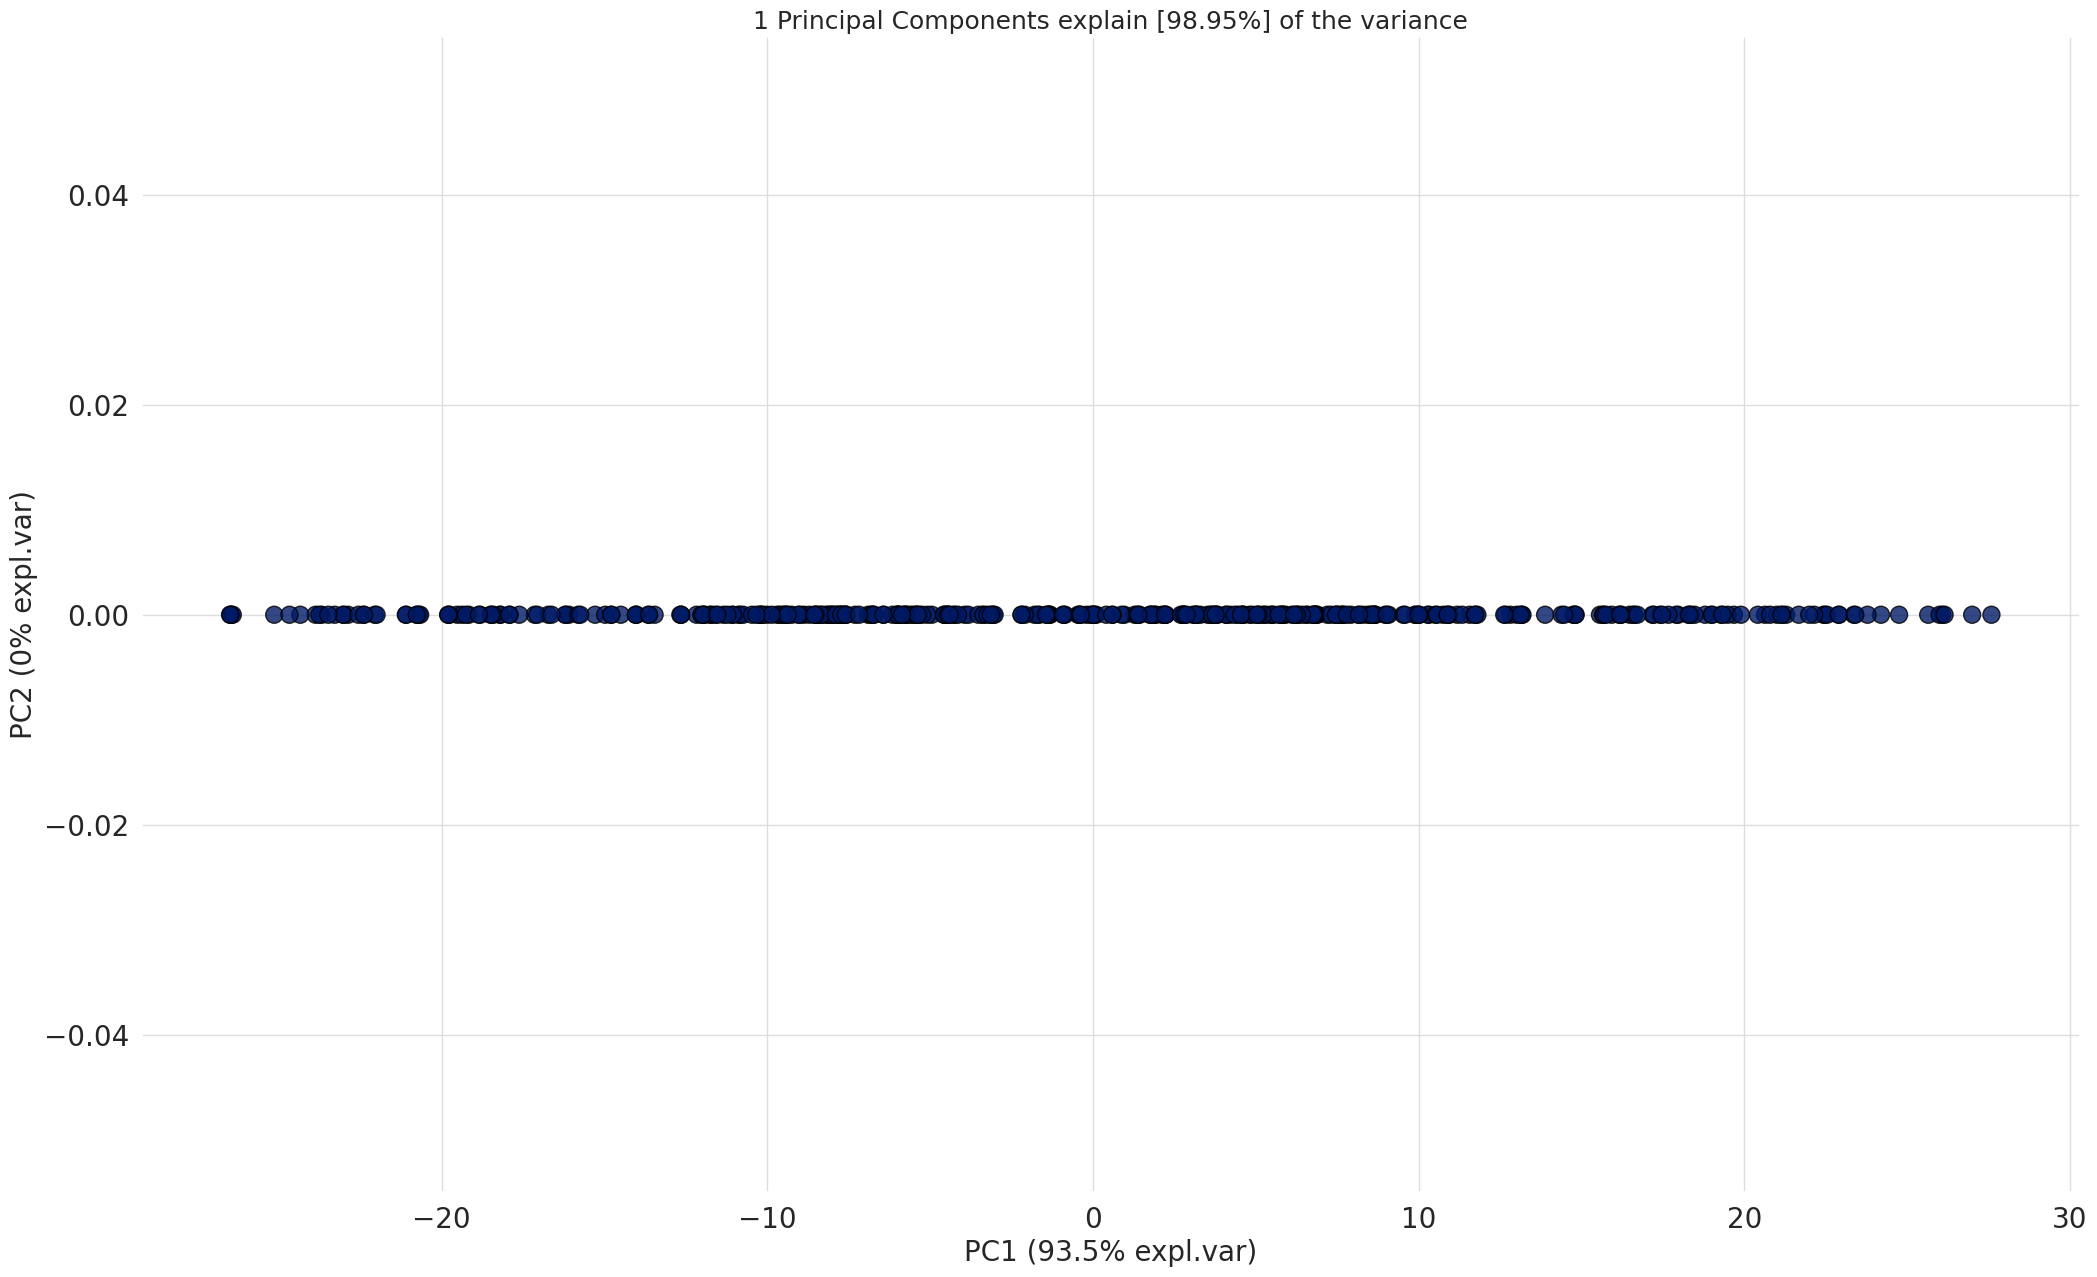

In [ ]:
model.scatter(label=True, legend=False)

In [ ]:
A = out['loadings'].T

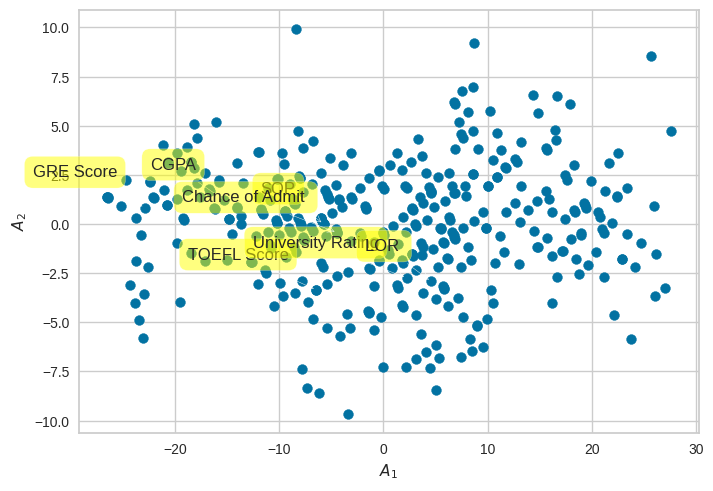

In [ ]:
plt.scatter(A.iloc[:, 0], A.iloc[:, 1], marker='o', c='b', s=50, cmap=plt.get_cmap('Spectral')) # Changed 'c' and 's' to valid values
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A.iloc[:, 0], A.iloc[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

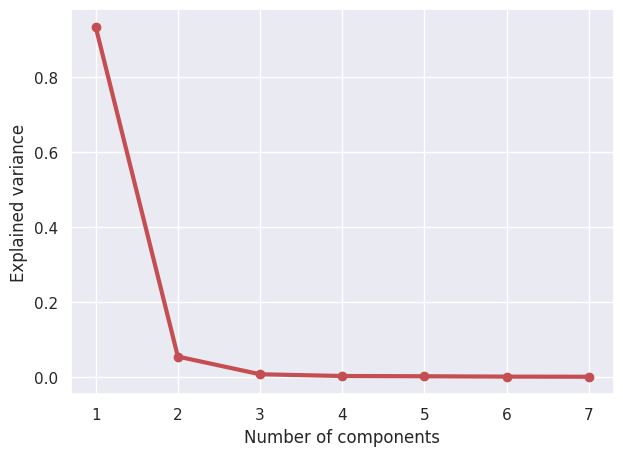

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

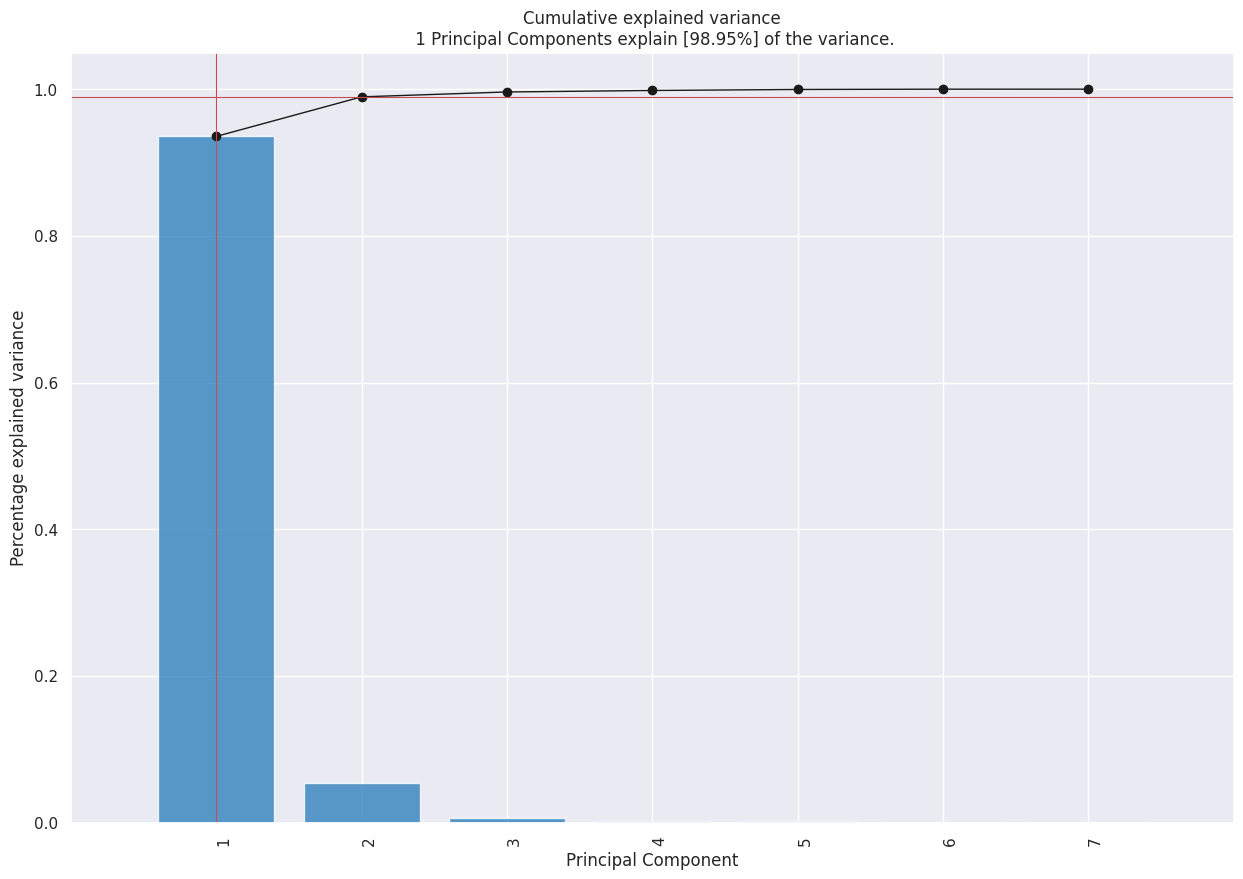

In [ ]:
model.plot();

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [98.95%] of the variance'}, xlabel='PC1 (93.5% expl.var)', ylabel='PC2 (5.39% expl.var)'>)

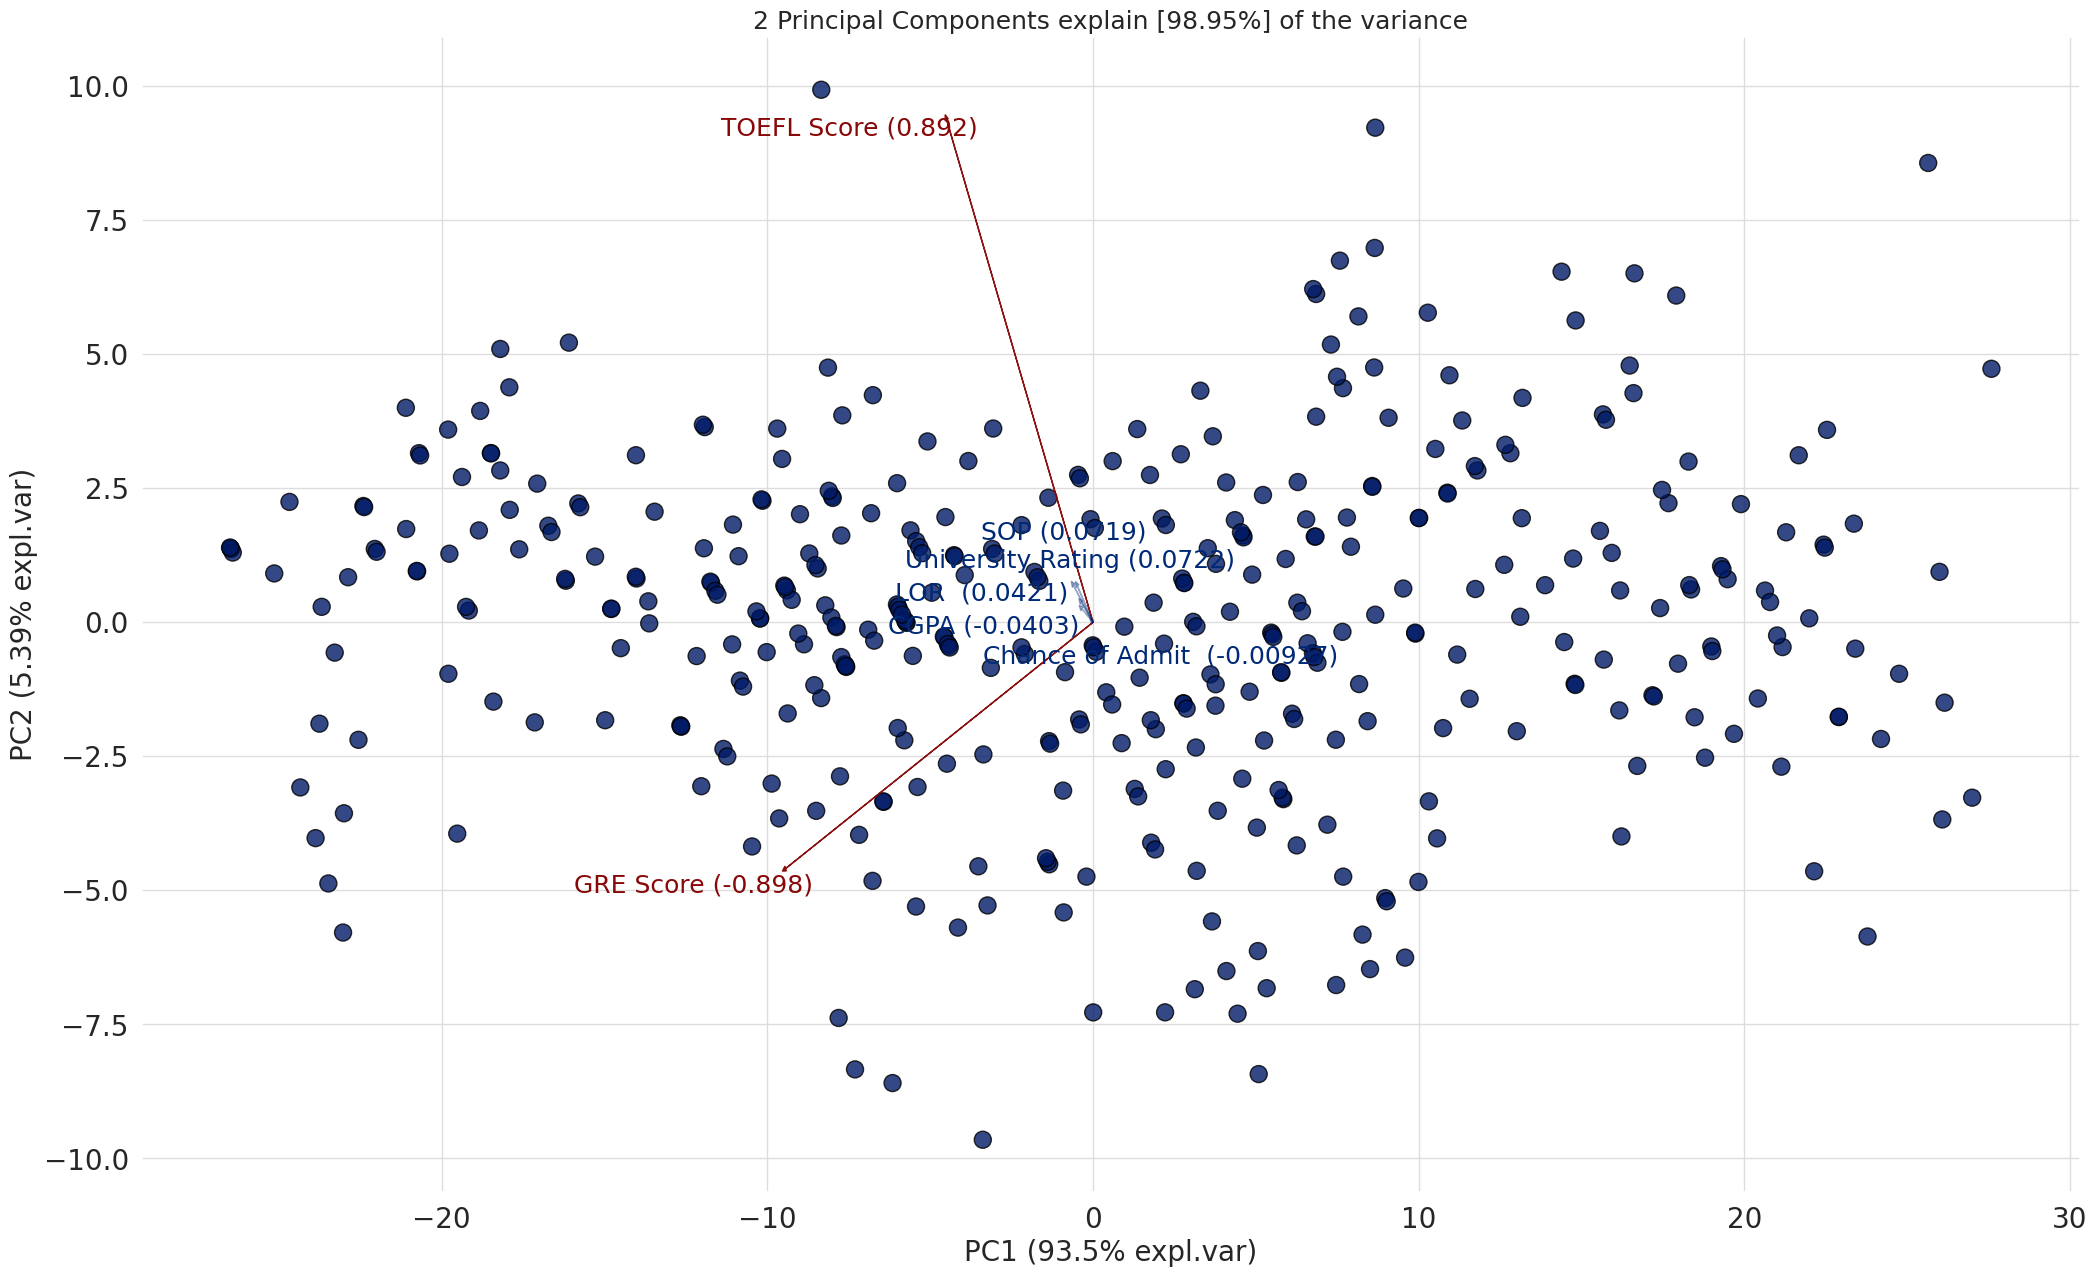

In [ ]:
# Initialize and keep at least 2 PCs
from pca import pca  # Assuming this line imports the correct pca class

# Create a new instance of the pca class
model = pca(n_components=2)  # or a higher number

# Fit transform
out = model.fit_transform(X)

# ... (rest of your code) ...

model.biplot(label=False, legend=False)


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (360, 8)
Unseen Data For Predictions: (40, 8)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Research', train_size=0.7, session_id=123)

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
clf_pca = setup(data=df, target='Research', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


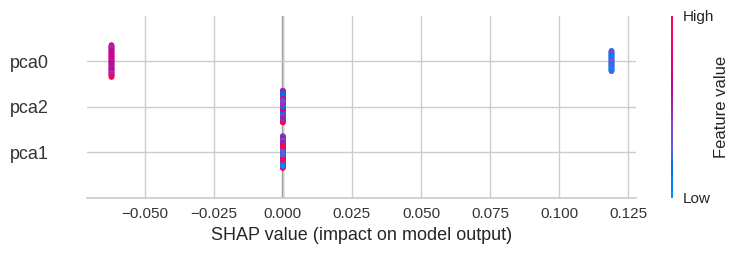

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Dimple7777/INSE6220/main/Admission_Predict.csv')

# Extract the numerical features (excluding 'Serial No.' and 'Research')
numerical_features = df.select_dtypes(include=np.number).drop(columns=['Serial No.'], errors='ignore')

# Define X
X = numerical_features

# Calculate the covariance matrix
cov_matrix = np.cov(X, rowvar=False)  # rowvar=False to calculate covariance between columns

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print eigenvalues and eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# To access individual eigenvectors, you can use indexing:
# For example, the first eigenvector is:
first_eigenvector = eigenvectors[:, 0]
print("\nFirst Eigenvector:\n", first_eigenvector)

Eigenvalues:
 [1.60993722e+02 9.27570864e+00 1.15043292e+00 3.50082145e-01
 3.93336192e-03 6.78586796e-02 1.60077747e-01 2.35193299e-01]

Eigenvectors:
 [[-0.89815804 -0.43696031 -0.03849947 -0.00408116 -0.00157493  0.01817451
   0.02309559  0.00357225]
 [-0.42757632  0.89213498 -0.14178098 -0.01459286 -0.00270768  0.02678816
  -0.00711622 -0.01353859]
 [-0.06292307  0.07215151  0.5910292   0.78394471 -0.00516799  0.07505258
   0.00497679 -0.14582751]
 [-0.05114194  0.07190409  0.57417726 -0.31239609  0.00394419  0.06197247
   0.11039169  0.74087853]
 [-0.04108884  0.04210333  0.52652662 -0.53514619 -0.02176582  0.10624432
  -0.00289048 -0.64896636]
 [-0.0403039   0.02985215  0.13195603 -0.01783751 -0.12498758 -0.98128535
  -0.01742689 -0.03012207]
 [-0.02274174 -0.00902151  0.06222948 -0.02865719 -0.02480291  0.02774142
  -0.99304421  0.08477089]
 [-0.00926965  0.00629348  0.03009517 -0.00942989  0.99158313 -0.12041685
  -0.02749545 -0.01965991]]

First Eigenvector:
 [-0.89815804 -0.4